In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Send a GET request to the website
response = requests.get("https://static.bc-edx.com/data/web/mars_facts/temperature.html")


In [15]:
# Parse the HTML content of the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [16]:
# Find the table in the HTML
table = soup.find_all('table')[0]

In [17]:
# Read the table into a DataFrame
df = pd.read_html(str(table))[0]

In [18]:
# Cast columns to appropriate data types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [25]:
# How many months exist on Mars?
num_months = df['month'].nunique()
print(f'There are {num_months} months on Mars.')

There are 12 months on Mars.


In [26]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_days = df['sol'].nunique()
print(f'There are {num_days} Martian days worth of data in the dataset.')

There are 1867 Martian days worth of data in the dataset.


In [28]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Find the average minimum daily temperature for all of the months.
avg_min_temp = df.groupby('month')['min_temp'].mean()

print(f'The warmest month on Mars is {avg_min_temp.idxmax()} with an average minimum temperature of {avg_min_temp.max()} degrees Celsius.')
print(f'The coldest month on Mars is {avg_min_temp.idxmin()} with an average minimum temperature of {avg_min_temp.min()} degrees Celsius.')


The warmest month on Mars is 8 with an average minimum temperature of -68.38297872340425 degrees Celsius.
The coldest month on Mars is 3 with an average minimum temperature of -83.30729166666667 degrees Celsius.


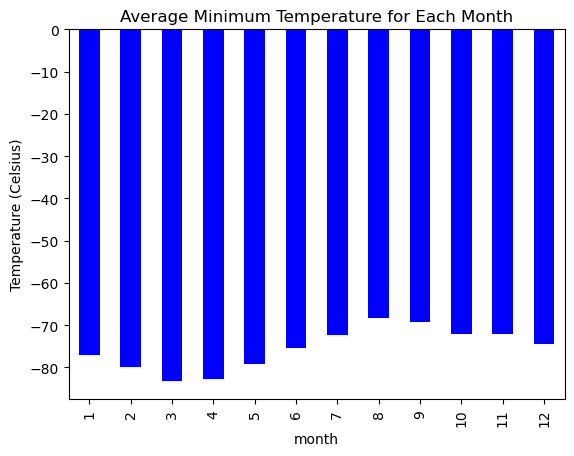

In [29]:
# Plot the results as a bar chart.
avg_min_temp.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature for Each Month')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [30]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
# Find the average daily atmospheric pressure of all the months.
avg_pressure = df.groupby('month')['pressure'].mean()

print(f'The month with the highest atmospheric pressure on Mars is {avg_pressure.idxmax()} with an average pressure of {avg_pressure.max()} Pa.')
print(f'The month with the lowest atmospheric pressure on Mars is {avg_pressure.idxmin()} with an average pressure of {avg_pressure.min()} Pa.')


The month with the highest atmospheric pressure on Mars is 9 with an average pressure of 913.3059701492538 Pa.
The month with the lowest atmospheric pressure on Mars is 6 with an average pressure of 745.0544217687075 Pa.


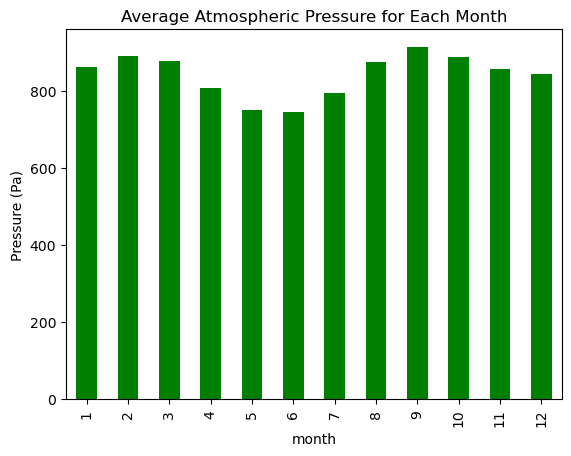

In [31]:
# Plot the results as a bar chart.
avg_pressure.plot(kind='bar', color='green')
plt.title('Average Atmospheric Pressure for Each Month')
plt.ylabel('Pressure (Pa)')
plt.show()

In [32]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
terrestrial_days = (df['terrestrial_date'].iloc[-1] - df['terrestrial_date'].iloc[0]).days
print(f'Approximately {terrestrial_days} terrestrial days exist in a Martian year.')


Approximately 2021 terrestrial days exist in a Martian year.


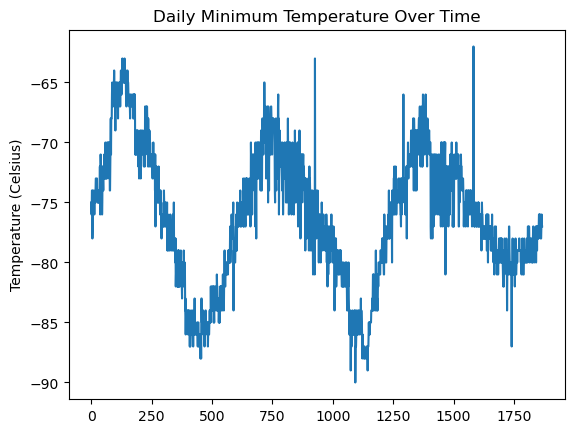

In [33]:
# Visually estimate the result by plotting the daily minimum temperature.
df['min_temp'].plot(kind='line')
plt.title('Daily Minimum Temperature Over Time')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [ ]:
# Export DataFrame to a CSV file
df.to_csv('mars_weather_data.csv', index=False)